In [2]:
import sunpy.timeseries as ts
from sunpy.net import Fido, attrs as a
from datetime import datetime

# Defining the time range for the GOES data
start_time = "2024-05-14T04:00:00"
end_time = "2024-05-14T06:00:00"

# Searcing for GOES X-ray data
result = Fido.search(a.Time(start_time, end_time), a.Instrument("XRS"), a.goes.SatelliteNumber(16))
result

Start Time,End Time,Instrument,SatelliteNumber,Physobs,Source,Provider,Resolution
Time,Time,str3,int64,str10,str4,str4,str5
2024-05-14 00:00:00.000,2024-05-14 23:59:59.999,XRS,16,irradiance,GOES,NOAA,flx1s
2024-05-14 00:00:00.000,2024-05-14 23:59:59.999,XRS,16,irradiance,GOES,NOAA,avg1m


In [ ]:
# Downloading the data
files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x71aa3d4554e0>
Traceback (most recent call last):
  File "/home/jashhwanth/anaconda3/envs/solarflare/lib/python3.12/asyncio/base_events.py", line 727, in __del__
    self.close()
  File "/home/jashhwanth/anaconda3/envs/solarflare/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/jashhwanth/anaconda3/envs/solarflare/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/jashhwanth/anaconda3/envs/solarflare/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


sci_xrsf-l2-flx1s_g16_d20240514_v2-2-0.nc:   0%|          | 0.00/5.24M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240514_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

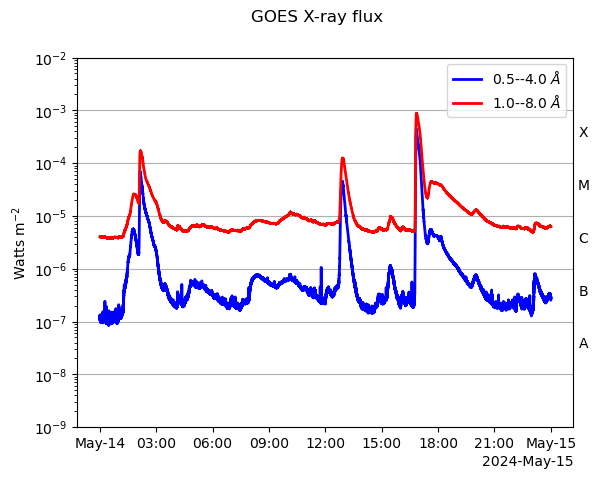

In [7]:
import sunpy.timeseries as ts
from sunpy.net import Fido, attrs as a
from datetime import datetime

# Loading the data into a SunPy TimeSeries
goes_ts = ts.TimeSeries(files[0], source='XRS')

# Plotting the GOES data
goes_ts.peek()

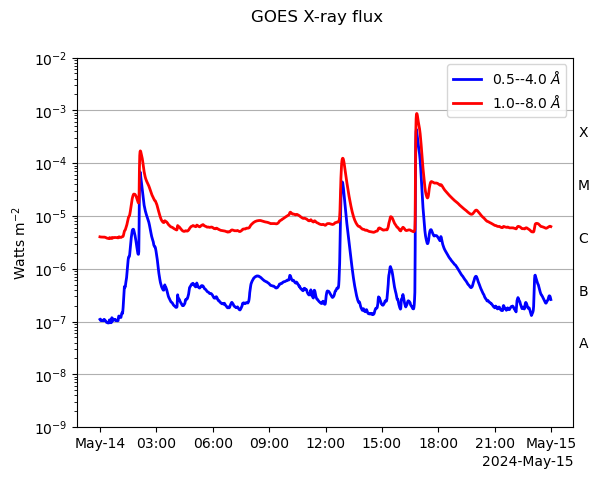

In [8]:
# Loading the data into a SunPy TimeSeries
goes_ts = ts.TimeSeries(files[1], source='XRS')

# Plotting the GOES data
goes_ts.peek()

In [9]:
# Saving the data as a CSV
goes_ts.to_dataframe().to_csv("goes_xray_flux.csv")